In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os



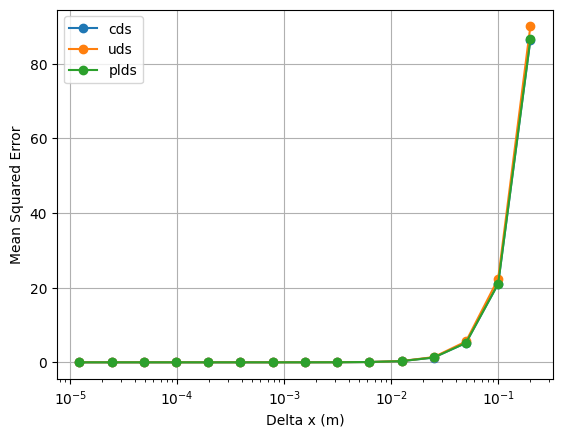

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the folder and patterns
folder_path = '../results'
file_patterns = ['anly', 'cds', 'uds', 'plds']

# Dictionary to store data for each pattern
data_dict = {pattern: [] for pattern in file_patterns}

# Read all files and store data in the dictionary
for file_name in os.listdir(folder_path):
    for pattern in file_patterns:
        if file_name.startswith(pattern) and file_name.endswith('.txt'):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Load data and append to the respective pattern list
                data = np.loadtxt(file_path, delimiter=',', skiprows=2)
                data_dict[pattern].append((file_name, data))
            except Exception as e:
                print(f"Error reading {file_name}: {e}")

# Store MSE results for each pattern
mse_results = {pattern: [] for pattern in ['cds', 'uds', 'plds']}

# Compute MSE for cds, uds, plds compared to corresponding anly files
for pattern in ['cds', 'uds', 'plds']:
    for file_name, data in data_dict[pattern]:
        # Extract the numerical part of the file name
        number = ''.join(filter(str.isdigit, file_name))
        anly_file = f"anly{number}.txt"
        
        # Find the corresponding analytical file
        anly_data = None
        for anly_name, anly_array in data_dict['anly']:
            if anly_name == anly_file:
                anly_data = anly_array
                break
        
        if anly_data is not None:
            # Compute MSE
            mse = np.mean((data - anly_data) ** 2)
            # Store the result as [n, mse]
            mse_results[pattern].append([int(number), mse])
        else:
            print(f"Analytical file {anly_file} not found for {file_name}.")

# Plotting MSE vs. n for each pattern
for pattern, results in mse_results.items():
    if results:
        # Sort results by n for proper plotting
        results.sort(key=lambda x: x[0])  # Sort by 'n'
        n_values = [n for n, mse in results]
        mse_values = [mse for n, mse in results]
        deltax_values = [1/n for n, mse in results]
        
        plt.plot(deltax_values, mse_values, label=pattern, marker='o')
        plt.xscale('log')

# Add labels, legend, and title
plt.xlabel('Delta x (m)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()